<a href="https://colab.research.google.com/github/oktaviacitra/classification/blob/main/PizzaSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

origin_path = "/content/drive"
drive.mount(origin_path)

Mounted at /content/drive


In [2]:
import pandas as pd

dataset_path = "/content/drive/MyDrive/Learning Journey/Pizza Sales/dataset.xlsx"
dataframe = pd.read_excel(dataset_path)
dataframe.head(3)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza


In [3]:
dataframe.isna().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


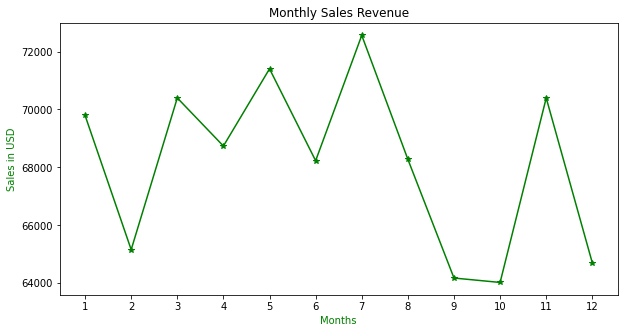

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

dataframe['month'] = pd.DatetimeIndex(dataframe['order_date']).month
dataframe_sales= dataframe.groupby("month").sum()
months=range(1,13)
plt.figure(figsize=(10,5))
plt.plot(months,dataframe_sales['total_price'],color='green', marker="*")
plt.xticks(months)
plt.xlabel('Months', color='g')
plt.ylabel('Sales in USD',color='g')
plt.title("Monthly Sales Revenue")  
plt.show()

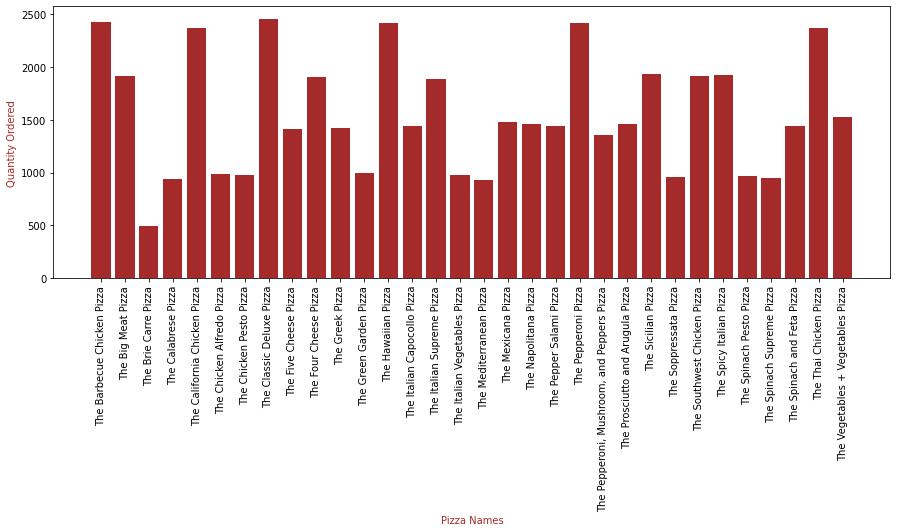

In [6]:
pizza_sum = dataframe.groupby("pizza_name").sum()
pizza_names =[name for name, df in dataframe.groupby('pizza_name')]
plt.figure(figsize=(15,5))
plt.bar(pizza_names,pizza_sum['quantity'],color="brown")
plt.xticks(pizza_names,rotation='vertical',size=10)
plt.xlabel('Pizza Names',color='brown')
plt.ylabel('Quantity Ordered',color='brown')
plt.show()